# Introduction : Dans ce mini-projet, nous allons modéliser un pendule puis résoudre numériquement des équations différentielles afin de représenter le mouvement du pendule en fonctions des divers paramètres de l'énoncé.

## I) Approximation des petits angles

### On commence par importer nos modules :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### On définit nos constantes :

In [2]:
qs = [1, 2, 5]
ti = 0
te = 20
step = 0.05
theta_ini = np.pi/18
omega = 1
ordre = 2

### On établit deux équations différentielles d'ordre 1 :

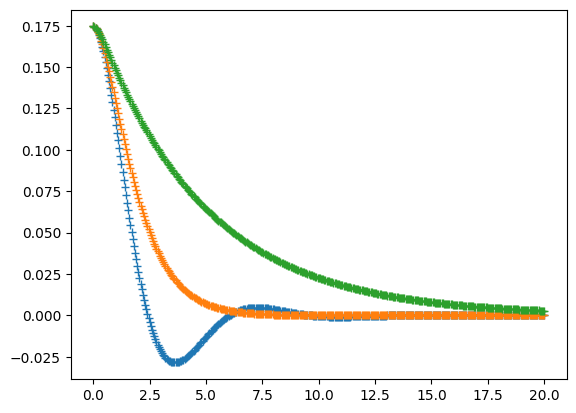

In [3]:
for i in qs : 
    def derivee_u(u, t) :
        du = np.empty(u.shape)
        du[0] = u[1]
        du[1] = (-omega**2 * u[0]) - (i * u[1])
    
        return du
        
    u_ini = np.array([np.pi / 18, 0.0])

    def rk4(start, end, step, theta_ini, derivee, ordre):
    
    # Création du tableau temps
        interval = end - start                     # Intervalle
        num_points = int(interval / step) + 1      # Nombre d'éléments
        t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
        u = np.empty((ordre, num_points))

    # Condition initiale
        u[:, 0] = u_ini 

    # Boucle for
        for i in range(num_points - 1):
            d1 = derivee_u(u[:, i], t[i])
            d2 = derivee_u(u[:, i] + step / 2 * d1, t[i] + step / 2)
            d3 = derivee_u(u[:, i] + step / 2 * d2, t[i] + step / 2)
            d4 = derivee_u(u[:, i] + step * d3, t[i] + step)
            u[:, i + 1] = u[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Argument de sortie
        return t, u

    t, urk4 = rk4(ti, te, step, theta_ini, derivee_u, ordre)
    
    plt.plot(t, urk4[0, :], '+')

## II) Force d'excitation

### On définit nos nouvelles constantes :

In [4]:
omega_e = (2*np.pi)/3
qis = [0, 1]

### On définit nos nouvelles équations différentielles :

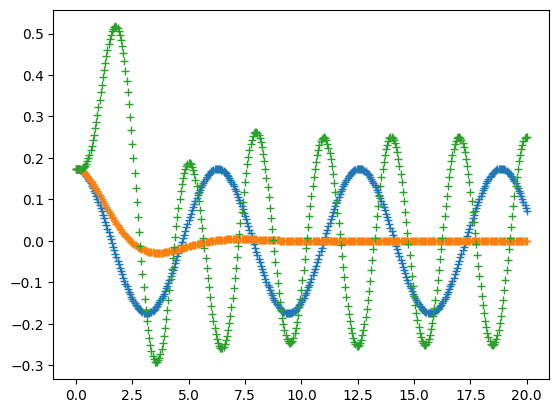

In [5]:
for i in qis : 
    def derivee_u(u, t) :
        du = np.empty(u.shape)
        du[0] = u[1]
        du[1] = (-omega**2 * u[0]) - (i * u[1])
    
        return du

    def rk4(start, end, step, theta_ini, derivee, ordre):
    
    # Création du tableau temps
        interval = end - start                     # Intervalle
        num_points = int(interval / step) + 1      # Nombre d'éléments
        t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
        u = np.empty((ordre, num_points))

    # Condition initiale
        u[:, 0] = u_ini 

    # Boucle for
        for i in range(num_points - 1):
            d1 = derivee_u(u[:, i], t[i])
            d2 = derivee_u(u[:, i] + step / 2 * d1, t[i] + step / 2)
            d3 = derivee_u(u[:, i] + step / 2 * d2, t[i] + step / 2)
            d4 = derivee_u(u[:, i] + step * d3, t[i] + step)
            u[:, i + 1] = u[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
            
        return t, u
    
    t, urk4 = rk4(ti, te, step, theta_ini, derivee_u, ordre)
    
    plt.plot(t, urk4[0, :], '+')
    
    
def derivee_ue(ue, t) :
    due = np.empty(ue.shape)
    due[0] = ue[1]
    due[1] = (-omega**2 * ue[0]) - (1 * ue[1]) + np.sin(omega_e*t)
    
    return due
    
ue_ini = np.array([np.pi / 18, 0.0])

def rk4_e(start, end, step, theta_ini, derivee_ue, ordre):
    
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments    
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    ue = np.empty((ordre, num_points))

    # Condition initiale
    ue[:, 0] = ue_ini 

    # Boucle for
    for i in range(num_points - 1):
        d5 = derivee_ue(ue[:, i], t[i])
        d6 = derivee_ue(ue[:, i] + step / 2 * d5, t[i] + step / 2)
        d7 = derivee_ue(ue[:, i] + step / 2 * d6, t[i] + step / 2)
        d8 = derivee_ue(ue[:, i] + step * d7, t[i] + step)
        ue[:, i + 1] = ue[:, i] + step / 6 * (d5 + 2 * d6 + 2 * d7 + d8)

    # Argument de sortie
    return t, ue

t, urk4_e = rk4_e(ti, te, step, theta_ini, derivee_ue, ordre)

plt.plot(t, urk4_e[0, :], '+')

## III) Mouvement chaotique

### On définit nos nouvelles constantes :

In [6]:
Fes = [1.4, 1.44, 1.465, 1.5]
ues_ini = ue_ini
tis = 0
tes = 100
steps = 0.1

### On résout nos nouvelles équations différentielles :

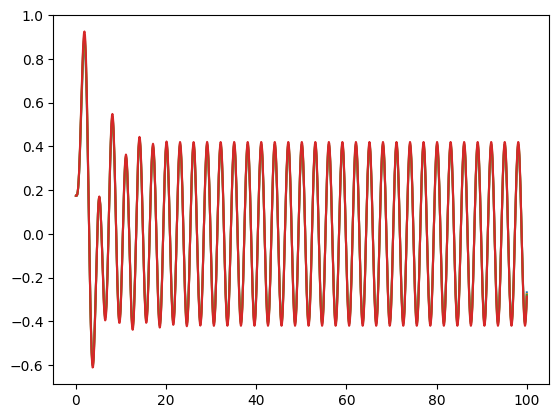

In [7]:
for i in Fes :
    
    def derivee_ues(ues, ts) :
        dues = np.empty(ues.shape)
        dues[0] = ues[1]
        dues[1] = (-omega**2 * np.sin(ues[0])) - (0.5 * ues[1]) + i * np.sin(omega_e*ts)
    
        return dues

    def rk4s(starts, ends, steps, theta_ini, derivee, ordre):
    
    # Création du tableau temps
        intervals = ends - starts                     # Intervalle
        num_pointss = int(intervals / steps) + 1      # Nombre d'éléments
        ts = np.linspace(starts, ends, num_pointss)    # Tableau temps t

    # Initialisation du tableau v
        ues = np.empty((ordre, num_pointss))

    # Condition initiale
        ues[:, 0] = ues_ini 

    # Boucle for
        for i in range(num_pointss - 1):
            d1 = derivee_ues(ues[:, i], ts[i])
            d2 = derivee_ues(ues[:, i] + steps / 2 * d1, ts[i] + steps / 2)
            d3 = derivee_ues(ues[:, i] + steps / 2 * d2, ts[i] + steps / 2)
            d4 = derivee_ues(ues[:, i] + steps * d3, ts[i] + steps)
            ues[:, i + 1] = ues[:, i] + steps / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
            
        return ts, ues
    
    ts, urk4s = rk4s(tis, tes, steps, theta_ini, derivee_ues, ordre)
    
    plt.plot(ts, urk4s[0, :], markersize = 3)

# Conclusion : En conclusion, nous avons réussi à modéliser les variations de l'angle $\theta$ du pendule grâce à la résolution numérique d'équations différentielles.